In [35]:
# initial setup for any notebook

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/home/yarcoh/projects/thesis-code4") # go to parent dir

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# imports

from src.deep.model_analyzer_src import ModelAnalyzer
from src.deep.data_loaders import DatasetNormal
from src.deep.models import *
from src.deep.trainers import Trainer

from tqdm.notebook import tqdm


In [37]:
# configs
model_name = 'mu-0.125__5000ds__UnetWithSkips__50epochs'
trained_model_path = '../../../data/prod_models/'+model_name

In [38]:
# load trainer from file
trainer: Trainer = Trainer.load3(trained_model_path)
ma: ModelAnalyzer = ModelAnalyzer(trainer,model_name)

In [39]:
print(len(trainer.train_dataset))

4000


In [ ]:
# this part doesnt seem to be essential anymore

# print('paths before:')
# print(trainer.train_dataset.data_dir_path)
# trainer.fix_datasets_paths(new_dataset_path='../../data/datasets', verbose=False)
# print('paths after:')
# print(trainer.train_dataset.data_dir_path)

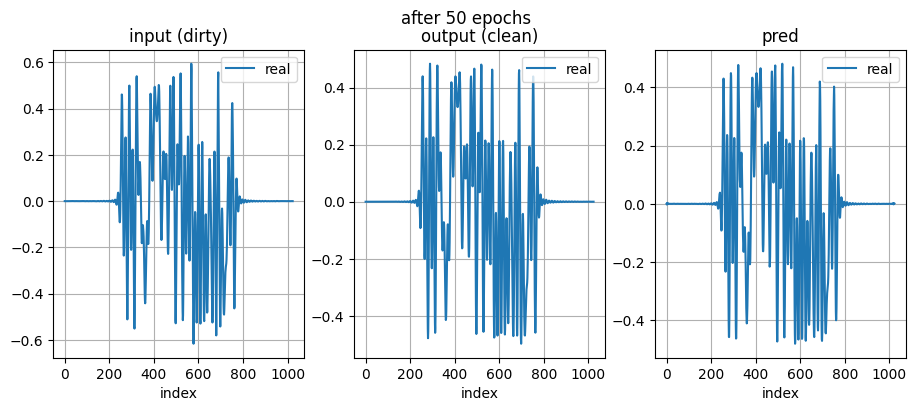

In [44]:
ma.plot_single_item(1)

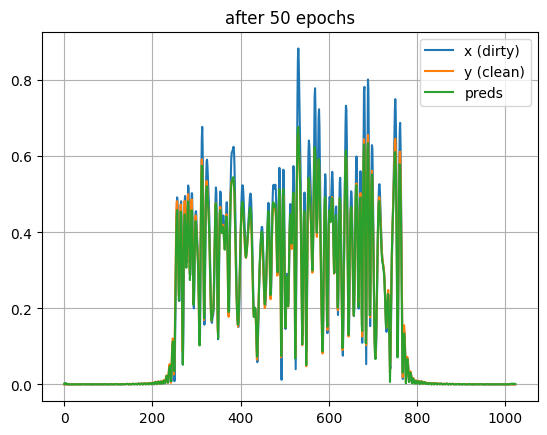

In [42]:
ma.plot_single_item_together(1)

In [46]:
x_power, y_power, pred_power = ma.calc_norms(_tqdm=tqdm, verbose_level=1, max_items=None)
print(f'x_power: {x_power}\ny_power: {y_power}\npred_power: {pred_power}')

  0%|          | 0/1000 [00:00<?, ?it/s]

x_power: 98.97041843414306
y_power: 80.54539345550552
pred_power: 80.15148394012441


In [47]:
ma.upload_single_item_plots_to_wandb(0)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: yarden92. Use `wandb login --relogin` to force relogin


In [48]:
ma.plot_bers(_tqdm=tqdm, verbose_level=1)

  0%|          | 0/1000 [00:00<?, ?it/s]

the original avg ber (of validation set) is 0.00049609375


  0%|          | 0/1000 [00:00<?, ?it/s]

the trained avg ber (of validation set) is 0.0
the ber improvement is 100.00%


In [51]:
ma.upload_bers_to_wandb()

the original avg ber (of validation set) is 0.00049609375
the trained avg ber (of validation set) is 0.0
the ber improvement is 100.00%


In [ ]:
# print model's architecture
# TODO - make sure every model has this method (make abstract model class that all inherit from)
# trainer.model.print_architecture

# THE END

In [ ]:
# paper 1 model analyzer
path_init = '../../data/test_models/mu-0.008__128ds__PaperNNforNFTmodel__3epochs'

trainer_real = Trainer.load3(path_init + '__real')
trainer_imag = Trainer.load3(path_init + '__imag')

train_ds = SingleMuDataSet(trainer_real.train_dataset.data_dir_path,
                           trainer_real.train_dataset.data_indices)
val_ds = SingleMuDataSet(trainer_real.val_dataset.data_dir_path,
                         trainer_real.val_dataset.data_indices)

model = PaperNNforNFTwrapper(trainer_real.model, trainer_imag.model)

trainer = Trainer(
    train_dataset=train_ds,
    val_dataset=val_ds,
    model=model,
    device=trainer_real.device,
    batch_size=trainer_real.train_dataloader.batch_size,
    l_metric=trainer_real.l_metric,
    optim=trainer_real.optim,
    params=trainer_real.params)

In [ ]:
trainer.params

In [ ]:
ma = ModelAnalyzer(trainer)

In [ ]:
ma.plot_single_item(i=0)

In [ ]:
ma.plot_bers(_tqdm=tqdm)